# Tutorial - VAE pretraining with a traditional contrastive loss; contrastive loss

## 1. Import requirements

In [1]:
import os
import sys
import pandas as pd
import torch
import time
import matplotlib.pyplot as plt

In [2]:
sys.path = [os.path.abspath(os.path.join(os.getcwd(), os.pardir))] + sys.path

In [3]:
from COMA.dataset import TrainingSmilesDataset, ValidationSmilesDataset
from vae_contrastive import SmilesAutoencoder

## 2. Configure GPU (if available)

In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
print(device)

cuda:0


## 3. Specify a target property

In [5]:
PROPERTY_NAME = "drd2"

## 4. Set directories (for inputs and outputs)

In [6]:
input_dir = os.path.abspath(os.path.join(os.pardir, "DATA", PROPERTY_NAME))

In [7]:
output_dir = f"outputs_8-1_{PROPERTY_NAME.upper()}_pretraining"
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

## 5. Set file names

In [8]:
filepath_train = os.path.join(input_dir, "rdkit_train_triplet.txt")
filepath_valid = os.path.join(input_dir, "rdkit_valid.txt")

In [9]:
filepath_char2idx      = os.path.join(output_dir, "char2idx.csv")
filepath_configs       = os.path.join(output_dir, "configs.csv")
filepath_checkpoint    = os.path.join(output_dir, "checkpoints.pt")
filepath_history       = os.path.join(output_dir, "history.csv")
filepath_history_valid = os.path.join(output_dir, "history_valid.csv")

## 6. Load datasets (for training and validation)

In [10]:
dataset = TrainingSmilesDataset(filepath_train, device=device)
dataset.save_char2idx(filepath_char2idx)
dataset_valid = ValidationSmilesDataset(filepath_valid, filepath_char2idx, device=device)

## 7. Initialize a generator of MTMR

In [11]:
## Model configuration
model_configs = {"hidden_size":128,
                 "latent_size":128,
                 "num_layers" :2,
                 "vocab_size" :dataset.vocab_size,
                 "sos_idx"    :dataset.sos_idx,
                 "eos_idx"    :dataset.eos_idx,
                 "pad_idx"    :dataset.pad_idx,
                 "device"     :device
                }

## Model initialization
generator = SmilesAutoencoder(**model_configs)

## Configuration save
generator.save_config(filepath_configs)

## 8. Train

In [12]:
df_history, df_history_valid = generator.fit(dataset,
                                             validation_dataset=dataset_valid,
                                             checkpoint_filepath=filepath_checkpoint)

df_history.to_csv(filepath_history, index=False)
df_history_valid.to_csv(filepath_history_valid, index=False)

[00000000/00100000]  loss(tr): 4.823  loss_recon_src(tr): 3.377  loss_recon_tar(tr): 3.379  loss_recon_neg(tr): 3.380  loss_kld(tr): 2.124  loss_contrastive(tr): 1.010  valid_ratio(va): 0.134  similarity(va): 0.003
[00001000/00100000]  loss(tr): 0.405  loss_recon_src(tr): 0.580  loss_recon_tar(tr): 0.383  loss_recon_neg(tr): 0.446  loss_kld(tr): 0.049  loss_contrastive(tr): 0.122
[00002000/00100000]  loss(tr): 0.363  loss_recon_src(tr): 0.513  loss_recon_tar(tr): 0.320  loss_recon_neg(tr): 0.428  loss_kld(tr): 0.035  loss_contrastive(tr): 0.118
[00003000/00100000]  loss(tr): 0.265  loss_recon_src(tr): 0.482  loss_recon_tar(tr): 0.254  loss_recon_neg(tr): 0.345  loss_kld(tr): 0.024  loss_contrastive(tr): 0.061
[00004000/00100000]  loss(tr): 0.253  loss_recon_src(tr): 0.508  loss_recon_tar(tr): 0.272  loss_recon_neg(tr): 0.355  loss_kld(tr): 0.023  loss_contrastive(tr): 0.042
[00005000/00100000]  loss(tr): 0.243  loss_recon_src(tr): 0.477  loss_recon_tar(tr): 0.228  loss_recon_neg(tr): 0

[00048000/00100000]  loss(tr): 0.147  loss_recon_src(tr): 0.322  loss_recon_tar(tr): 0.175  loss_recon_neg(tr): 0.275  loss_kld(tr): 0.002  loss_contrastive(tr): 0.015
[00049000/00100000]  loss(tr): 0.140  loss_recon_src(tr): 0.348  loss_recon_tar(tr): 0.178  loss_recon_neg(tr): 0.266  loss_kld(tr): 0.002  loss_contrastive(tr): 0.006
[00050000/00100000]  loss(tr): 0.139  loss_recon_src(tr): 0.344  loss_recon_tar(tr): 0.182  loss_recon_neg(tr): 0.254  loss_kld(tr): 0.003  loss_contrastive(tr): 0.007  valid_ratio(va): 1.000  similarity(va): 0.158
[00051000/00100000]  loss(tr): 0.147  loss_recon_src(tr): 0.350  loss_recon_tar(tr): 0.177  loss_recon_neg(tr): 0.260  loss_kld(tr): 0.002  loss_contrastive(tr): 0.014
[00052000/00100000]  loss(tr): 0.140  loss_recon_src(tr): 0.336  loss_recon_tar(tr): 0.176  loss_recon_neg(tr): 0.242  loss_kld(tr): 0.003  loss_contrastive(tr): 0.012
[00053000/00100000]  loss(tr): 0.137  loss_recon_src(tr): 0.331  loss_recon_tar(tr): 0.180  loss_recon_neg(tr): 0

[00096000/00100000]  loss(tr): 0.135  loss_recon_src(tr): 0.335  loss_recon_tar(tr): 0.184  loss_recon_neg(tr): 0.243  loss_kld(tr): 0.002  loss_contrastive(tr): 0.006
[00097000/00100000]  loss(tr): 0.137  loss_recon_src(tr): 0.338  loss_recon_tar(tr): 0.175  loss_recon_neg(tr): 0.275  loss_kld(tr): 0.001  loss_contrastive(tr): 0.004
[00098000/00100000]  loss(tr): 0.144  loss_recon_src(tr): 0.343  loss_recon_tar(tr): 0.191  loss_recon_neg(tr): 0.294  loss_kld(tr): 0.002  loss_contrastive(tr): 0.003
[00099000/00100000]  loss(tr): 0.144  loss_recon_src(tr): 0.333  loss_recon_tar(tr): 0.181  loss_recon_neg(tr): 0.272  loss_kld(tr): 0.002  loss_contrastive(tr): 0.011
[00100000/00100000]  loss(tr): 0.131  loss_recon_src(tr): 0.326  loss_recon_tar(tr): 0.189  loss_recon_neg(tr): 0.242  loss_kld(tr): 0.002  loss_contrastive(tr): 0.004  valid_ratio(va): 1.000  similarity(va): 0.158


## 9. Visualize for loss analysis

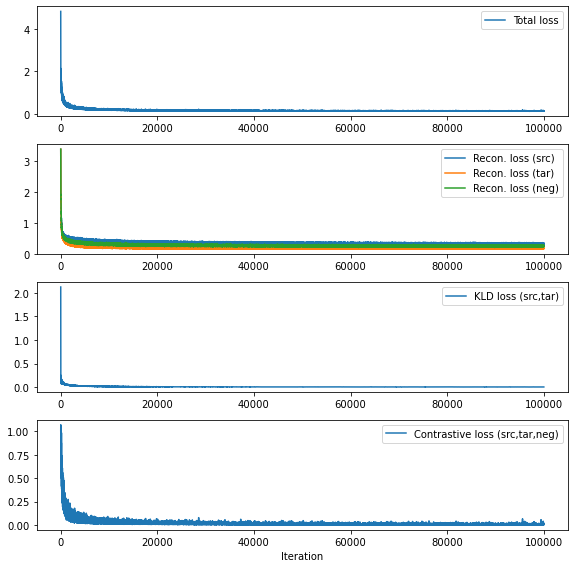

In [13]:
fig, axes = plt.subplots(4,1,figsize=(8,8))

axes[0].plot(df_history.loc[:,"LOSS_TOTAL"], label="Total loss")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_SOURCE"], label="Recon. loss (src)")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_TARGET"], label="Recon. loss (tar)")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_NEGATIVE"], label="Recon. loss (neg)")
axes[2].plot(df_history.loc[:,"LOSS_KL_DIVERGENCE"], label="KLD loss (src,tar)")
axes[3].plot(df_history.loc[:,"LOSS_CONTRASTIVE"], label="Contrastive loss (src,tar,neg)")

axes[3].set_xlabel("Iteration")
for ax in axes:
    ax.legend(loc='best')

plt.tight_layout()
plt.show()

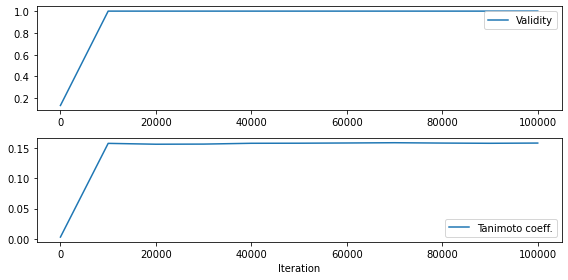

In [14]:
fig, axes = plt.subplots(2,1,figsize=(8,4))

axes[0].plot(df_history_valid.loc[:,"VALID_RATIO"], label="Validity")
axes[1].plot(df_history_valid.loc[:,"AVERAGE_SIMILARITY"], label="Tanimoto coeff.")

axes[1].set_xlabel("Iteration")
for ax in axes:
    ax.legend(loc='best')

plt.tight_layout()
plt.show()